In [5]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score

In [8]:
tracks = pd.read_csv('C:\\Users\\Zen\\Desktop\\SongClassification\\input\\songsdata\\fma-rock-vs-hiphop.csv')
music_features = pd.read_json('C:\\Users\\Zen\\Desktop\\SongClassification\\input\\songsdata\\echonest-metrics.json',precise_float=True)

In [9]:
tracks.head()

,track_id,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,...,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
0,135,256000,1,NaN,2008-11-26 01:43:26,2008-11-26 00:00:00,837,0,Rock,"[45, 58]",...,NaN,2484,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1832,NaN,0,NaN,[],Father's Day
1,136,256000,1,NaN,2008-11-26 01:43:35,2008-11-26 00:00:00,509,0,Rock,"[45, 58]",...,NaN,1948,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1498,NaN,0,NaN,[],Peel Back The Mountain Sky
2,151,192000,0,NaN,2008-11-26 01:44:55,NaN,192,0,Rock,[25],...,NaN,701,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,148,NaN,4,NaN,[],Untitled 04
3,152,192000,0,NaN,2008-11-26 01:44:58,NaN,193,0,Rock,[25],...,NaN,637,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,98,NaN,11,NaN,[],Untitled 11
4,153,256000,0,Arc and Sender,2008-11-26 01:45:00,2008-11-26 00:00:00,405,5,Rock,[26],...,NaN,354,en,Attribution-NonCommercial-NoDerivatives (aka M...,424,NaN,2,NaN,[],Hundred-Year Flood


In [10]:
music_features.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661
3,10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590
4,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072


In [11]:
audio_data=music_features.merge(tracks[['genre_top', 'track_id']], on='track_id')

In [12]:
audio_data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
0,2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
1,3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
2,5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
3,134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop
4,153,0.988306,0.255661,0.979774,0.973006,0.121342,0.051740,90.241,0.034018,Rock


In [13]:
audio_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 375.3+ KB


In [14]:
correlations = audio_data.corr()
correlations.style.background_gradient()

ValueError: could not convert string to float: 'Hip-Hop'

In [15]:
features = audio_data.drop(['genre_top','track_id'],axis=1)
labels = audio_data['genre_top']

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [17]:
pca = PCA()
pca.fit(scaled_features)
exp_variance = pca.explained_variance_ratio_
num_components = pca.n_components_

Text(0.5, 0, 'Principal Component #')

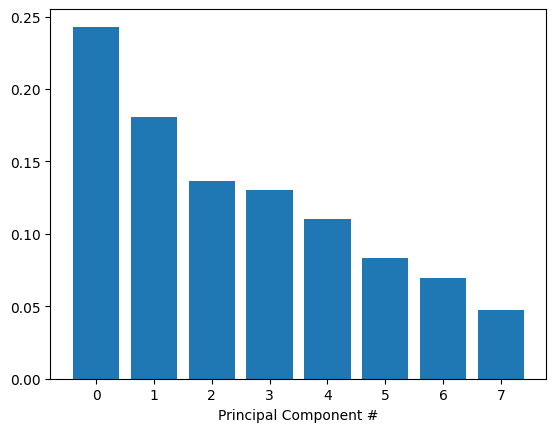

In [18]:
fig, ax = plt.subplots()
ax.bar(range(num_components), exp_variance)
ax.set_xlabel('Principal Component #')

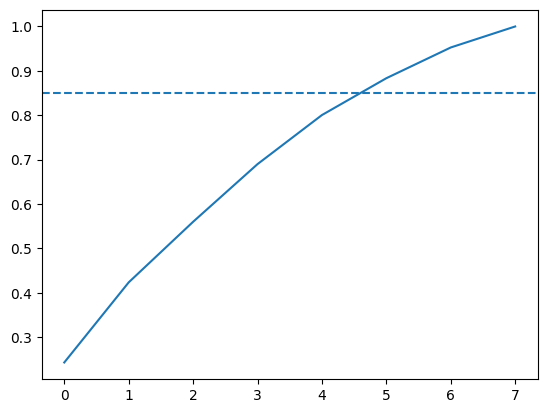

In [19]:
cum_exp_variance = np.cumsum(exp_variance) 

fig, ax = plt.subplots()
ax.plot(cum_exp_variance)
ax.axhline(y=0.85, linestyle='--') 

In [20]:
n_components = 6

In [21]:
pca = PCA(n_components, random_state=10)
pca.fit(scaled_features)
pca_projection = pca.transform(scaled_features)

In [22]:
pca_projection.shape

(4802, 6)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(pca_projection,labels,random_state=10)

In [24]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [25]:
predictions_dt = model_dt.predict(X_test)
print("Decision Tree Classifier:", model_dt.score(X_test,y_test))

Decision Tree Classifier: 0.8434637801831807


In [26]:
model_lg = LogisticRegression(random_state=10)
model_lg.fit(X_train,y_train)

LogisticRegression(random_state=10)

In [27]:
predictions_lg = model_lg.predict(X_test)
print("Logistic Regression:", model_lg.score(X_test,y_test))

Logistic Regression: 0.8784346378018318


In [28]:
report_dt = classification_report(y_test,predictions_dt)
report_lg = classification_report(y_test,predictions_lg)

print("Decision Tree Classifier: \n", report_dt)
print("Logistic Regression: \n", report_lg)

Decision Tree Classifier: 
               precision    recall  f1-score   support

     Hip-Hop       0.60      0.60      0.60       235
        Rock       0.90      0.90      0.90       966

    accuracy                           0.84      1201
   macro avg       0.75      0.75      0.75      1201
weighted avg       0.84      0.84      0.84      1201

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.77      0.54      0.64       235
        Rock       0.90      0.96      0.93       966

    accuracy                           0.88      1201
   macro avg       0.83      0.75      0.78      1201
weighted avg       0.87      0.88      0.87      1201



<Axes: xlabel='count', ylabel='genre_top'>

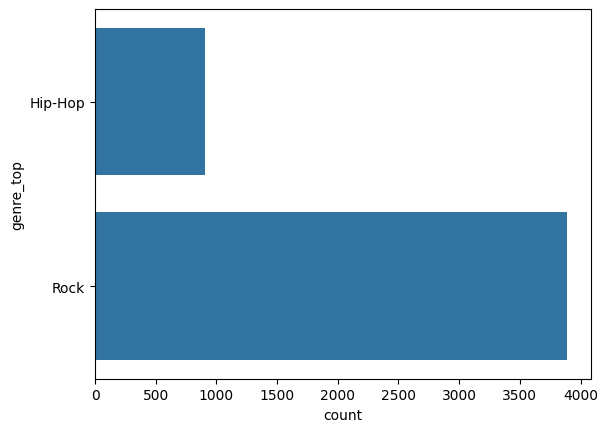

In [29]:
sns.countplot(audio_data['genre_top'], label = "Count") 

In [30]:
hip_hop = audio_data.loc[audio_data['genre_top'] == 'Hip-Hop']
rock = audio_data.loc[audio_data['genre_top'] == 'Rock']

In [31]:
hip_hop.shape

(910, 10)

In [32]:
rock.shape

(3892, 10)

In [33]:
rock = rock.sample(hip_hop.shape[0], random_state=10)

In [34]:
balanced_data = pd.concat([rock, hip_hop])

In [35]:
balanced_data.head()

,track_id,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
773,4038,0.825838,0.263645,0.797948,0.842318,0.177089,0.045277,166.580,0.713586,Rock
2273,19501,0.966635,0.386114,0.651980,0.869472,0.353138,0.032208,130.767,0.712374,Rock
2846,31252,0.721510,0.358035,0.948187,0.801184,0.105706,0.095522,125.884,0.208728,Rock
2147,17947,0.617370,0.487321,0.918848,0.817050,0.089908,0.040337,129.565,0.268893,Rock
2654,27421,0.025464,0.245523,0.422381,0.938011,0.441009,0.038795,149.960,0.439876,Rock


In [36]:
features = balanced_data.drop(['genre_top', 'track_id'], axis=1) 
labels = balanced_data['genre_top']

In [37]:
pca_projection = pca.fit_transform(scaler.fit_transform(features))
pca_projection.shape

(1820, 6)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(pca_projection, labels, random_state=10)

In [39]:
model_dt = DecisionTreeClassifier(random_state=10)
model_dt.fit(X_train,y_train)
predictions_dt = model_dt.predict(X_test)

In [40]:
model_lr = LogisticRegression(random_state=10)
model_lr.fit(X_train,y_train)
predictions_lr = model_lr.predict(X_test)

In [41]:
print("Decision Tree: \n", classification_report(y_test, predictions_dt))
print("Logistic Regression: \n", classification_report(y_test, predictions_lr))

Decision Tree: 
               precision    recall  f1-score   support

     Hip-Hop       0.75      0.75      0.75       230
        Rock       0.74      0.74      0.74       225

    accuracy                           0.75       455
   macro avg       0.75      0.75      0.75       455
weighted avg       0.75      0.75      0.75       455

Logistic Regression: 
               precision    recall  f1-score   support

     Hip-Hop       0.84      0.80      0.82       230
        Rock       0.80      0.85      0.83       225

    accuracy                           0.82       455
   macro avg       0.82      0.82      0.82       455
weighted avg       0.82      0.82      0.82       455



In [42]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [43]:
scores = cross_val_score(model_dt, X_test,y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print("Decision Tree Classifier Accuracy:", np.mean((scores)))

Decision Tree Classifier Accuracy: 0.7958454106280193


In [44]:
scores = cross_val_score(model_lg, X_test,y_test, scoring='accuracy', cv=cv, n_jobs=-1)
print("Logistic Regression Accuracy:", np.mean((scores)))

Logistic Regression Accuracy: 0.8157971014492755
